# Main Project


## 1.1 Problem Statement

- This project understands how the student's performance (test scores) is affected by other variables such as:
  - Parental level of education
  - Lunch
  - Test preparation course


### 1.2.1 Importing Libraries

- **Pandas**: Data handling and analysis.
- **Numpy**: Numerical computation.
- **Seaborn**: Statistical visualization (heatmaps, correlations, etc.).
- **Matplotlib**: Fundamental plotting library.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data and Pandas Dataframe


In [2]:
df = pd.read_csv('data/stud.csv')

##### Top 5 record


In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Shape of dataset


In [5]:
df.shape

(1000, 8)

## 2. Dataset Information

- Gender: sex of student -> (Male / Female)
- race/ethnicity: student's ethnicity -> (Group A, B, C, D or E)
- parental level of education: parent's final education -> (BSc, college, Msc, asso degree or High sch)
- Lunch: lunch before test -> (standard or free/reduced)
- test preparation course: complete or not complete before test
- math score
- reading score
- writing score


## 3. Data checks to perform

- Check Missing Values
- Check Duplicate
- Check data type
- Check the number of unique values of each column
- Check statistic of dataset
- Check various categories present in the different categorical columns


##### 3.1 Check missing values


In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### There are no missing values


##### 3.2 Checking duplicate values


In [12]:
int(df.duplicated().sum())

0

##### There are no duplicates


#### 3.3 Check Data Type


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking number of unique values of each column


In [14]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check statistic of dataset


In [16]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight

- We can observe that the mean scores for each are very close, between 66 and 68;
- Likewise same for the standard deviation , which is betweeen 14.6 and 15.19;
- Math is the only subject with a minimun of 0 and whiles others are 10 and 17 between writing and reading respectively


### 3.7 Data Exploration


In [18]:
print('Categories in `gender` variables: ', end=" ")
print(df['gender'].unique())

print('Categories in `race/ethnicity` variables: ', end=" ")
print(df['race_ethnicity'].unique())

print('Categories in `parental level of education` variables: ', end=" ")
print(df['parental_level_of_education'].unique())

print('Categories in `lunch` variables: ', end=" ")
print(df['lunch'].unique())

print('Categories in `test preparation` variables: ', end=" ")
print(df['test_preparation_course'].unique())

Categories in `gender` variables:  ['female' 'male']
Categories in `race/ethnicity` variables:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in `parental level of education` variables:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in `lunch` variables:  ['standard' 'free/reduced']
Categories in `test preparation` variables:  ['none' 'completed']


In [19]:
# Define numerical and categorical columns

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print(f'We have {len(numerical_features)} numerical features: {numerical_features}\n')
print(f'We have {len(categorical_features)} categorical features: {categorical_features}')


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


##### 3.8 Adding "Average" and "Total Score" Column


In [20]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
maths_full = df[df['math_score'] == 100]['average_score'].count()
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()

print(f'The number of student with full mark in Math: {maths_full}')
print(f'The number of student with full mark in Reading: {reading_full}')
print(f'The number of student with full mark in Writing: {writing_full}')

The number of student with full mark in Math: 7
The number of student with full mark in Reading: 17
The number of student with full mark in Writing: 14


In [23]:
maths_full = df[df['math_score'] <= 20]['average_score'].count()
reading_full = df[df['reading_score'] <= 20]['average_score'].count()
writing_full = df[df['writing_score'] <= 20]['average_score'].count()

print(f'The number of student with less than 20 mark in Math: {maths_full}')
print(f'The number of student with less than 20 mark in Reading: {reading_full}')
print(f'The number of student with less than 20 mark in Writing: {writing_full}')

The number of student with less than 20 mark in Math: 4
The number of student with less than 20 mark in Reading: 1
The number of student with less than 20 mark in Writing: 3


# Insights from Student Performance Data

## Full Marks Insights:

- **Math:**

  - Only **7 students** achieved a perfect score.
  - This is the **lowest number of perfect scores** among the three subjects.

- **Reading:**

  - **17 students** achieved full marks, which is more than **double the number for Math**.
  - Reading seems to be the area where students excel the most.

- **Writing:**
  - **14 students** achieved full marks, higher than Math but slightly lower than Reading.

### Interpretation:

- Students tend to perform better in **Reading and Writing** compared to **Math** when it comes to achieving perfect scores.
- **Math** appears to be the most challenging subject for students.

---

## Low Score Insights (≤20 Marks):

- **Math:**

  - **4 students** scored **≤20**, the **highest number of low scorers** among all subjects.

- **Reading:**

  - Only **1 student** scored ≤20, showing that the majority of students have **basic competence** in reading.

- **Writing:**
  - **3 students** scored ≤20, which is slightly worse than Reading but much better than Math.

### Interpretation:

- **Math** has the highest number of students with low scores, indicating it’s the weakest subject for most students.
- **Reading** is the strongest subject, with the fewest low scorers (only 1).
- **Writing** is a close second to Reading but slightly worse when considering the number of low scores.

---

## General Takeaway:

1. **Math** requires **focused attention** or improvements in teaching methods, as students struggle more in this subject.
2. **Reading and Writing** are **relatively stronger areas**, with a higher proportion of proficient and high-achieving students.
3. Further analysis is recommended to explore factors impacting **Math performance**, such as:
   - **Parental education levels**.
   - **Test preparation courses**.
   - **Available resources and teaching methods**.


### 4. Exploration of Data (Visualization)


#### 4.1 Visualize average score distribution to make conclusion

- Histogram
- Kernel Distribution Function (KDE)


#### 4.1.1 Histogran and KDE


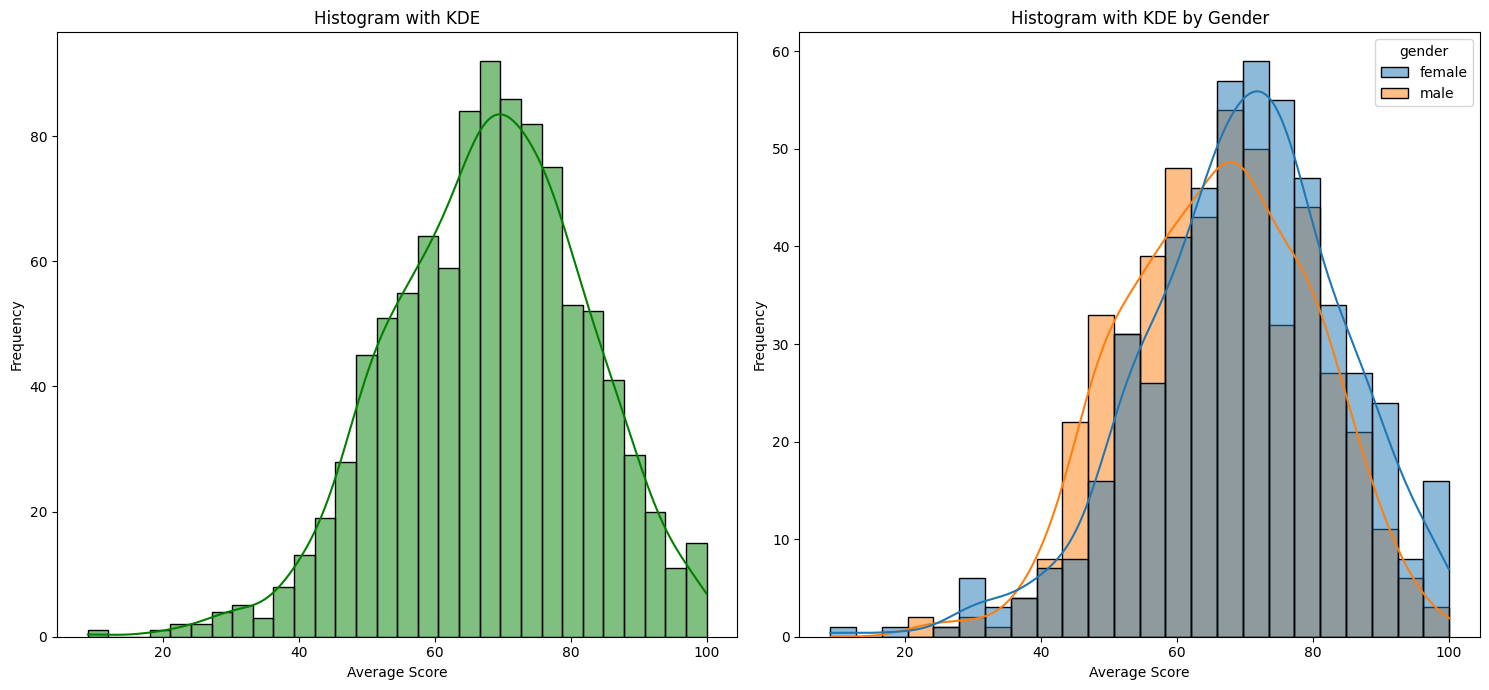

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))  # create 1 row and 2 columns subplots

# First subplot (left)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Histogram with KDE')  # Title for the first subplot
axs[0].set_xlabel('Average Score')  # X-axis label for the first subplot
axs[0].set_ylabel('Frequency')  # Y-axis label for the first subplot

# Second subplot (right)
sns.histplot(data=df, x='average_score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Histogram with KDE by Gender')  # Title for the second subplot
axs[1].set_xlabel('Average Score')  # X-axis label for the second subplot
axs[1].set_ylabel('Frequency')  # Y-axis label for the second subplot

plt.tight_layout()  # Automatically adjust the spacing
plt.show()  # Show the plot


### Insight

- Female student generaly perform well compared to the male students


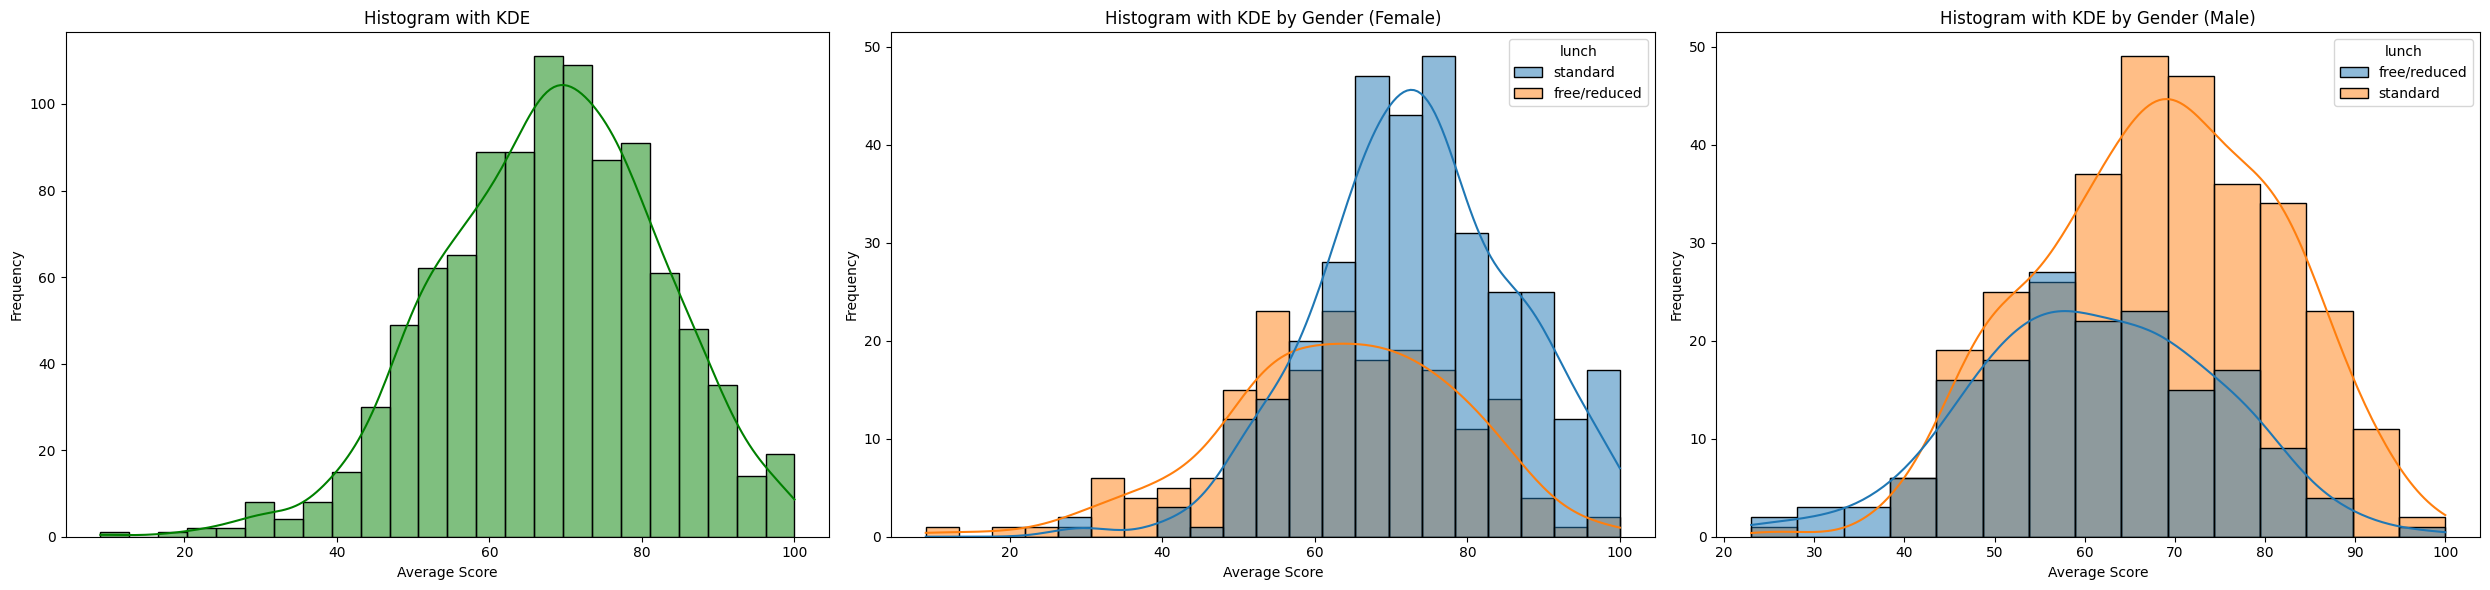

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# First subplot
sns.histplot(data=df, x='average_score', kde=True, color='g', ax=axs[0])
axs[0].set_title('Histogram with KDE')
axs[0].set_xlabel('Average Score')
axs[0].set_ylabel('Frequency')

# Second subplot (Female data)
sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='lunch', ax=axs[1])
axs[1].set_title('Histogram with KDE by Gender (Female)')
axs[1].set_xlabel('Average Score')
axs[1].set_ylabel('Frequency')

# Third subplot (Male data)
sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='lunch', ax=axs[2])
axs[2].set_title('Histogram with KDE by Gender (Male)')
axs[2].set_xlabel('Average Score')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Insight

- Standard lunch help better in exams performance


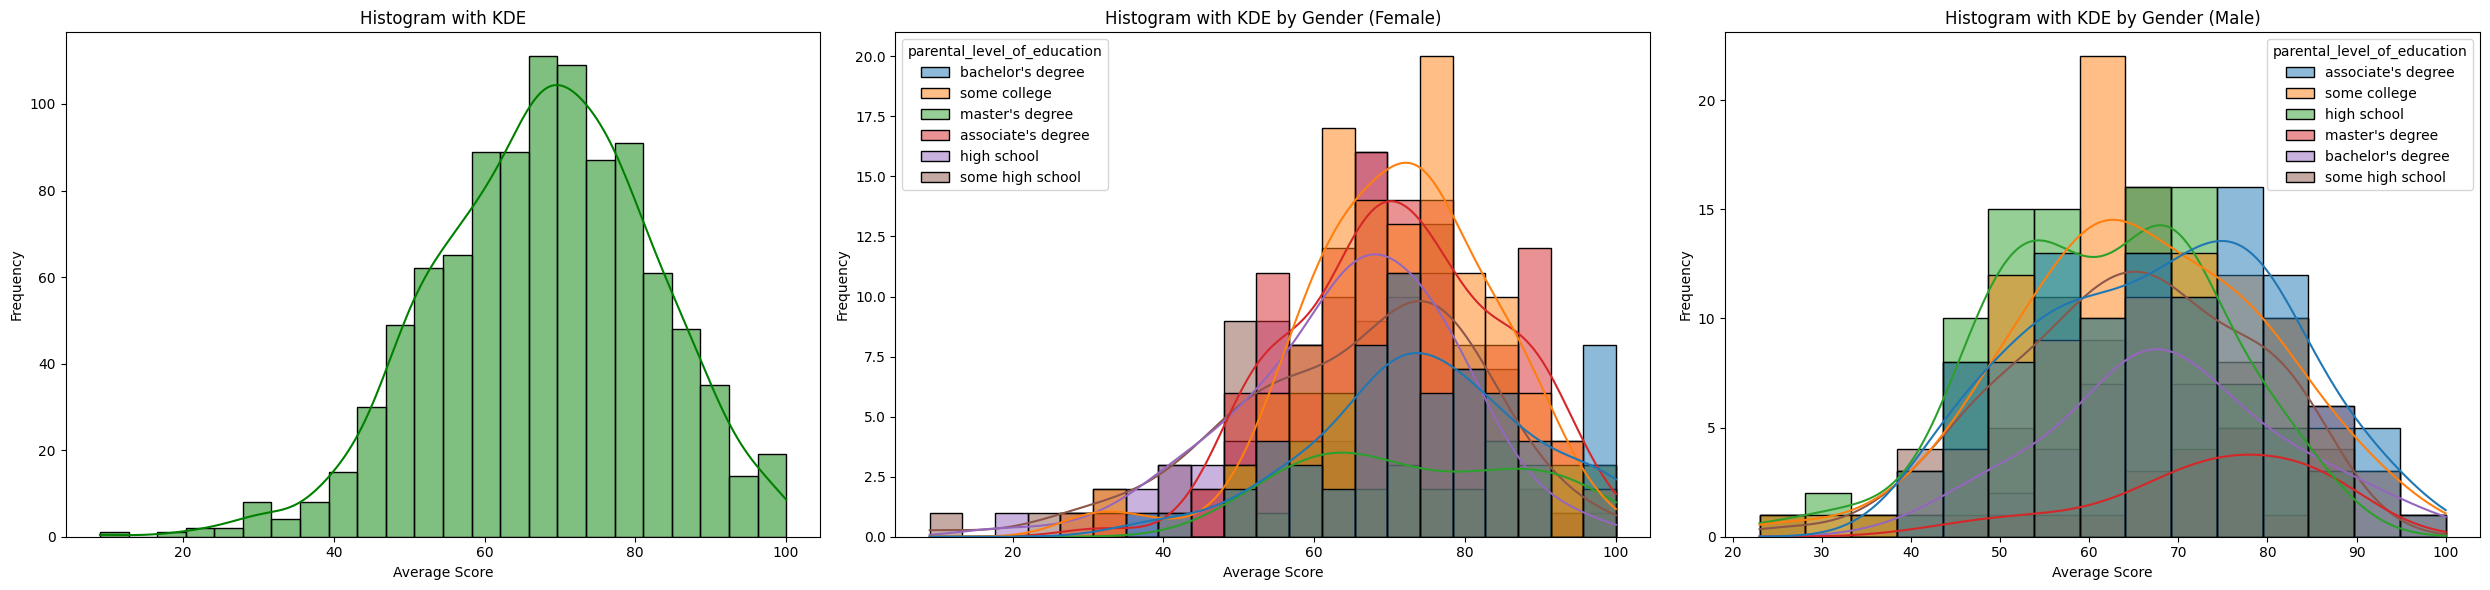

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# First subplot
sns.histplot(data=df, x='average_score', kde=True, color='g', ax=axs[0])
axs[0].set_title('Histogram with KDE')
axs[0].set_xlabel('Average Score')
axs[0].set_ylabel('Frequency')

# Second subplot (Female data)
sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='parental_level_of_education', ax=axs[1])
axs[1].set_title('Histogram with KDE by Gender (Female)')
axs[1].set_xlabel('Average Score')
axs[1].set_ylabel('Frequency')

# Third subplot (Male data)
sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='parental_level_of_education', ax=axs[2])
axs[2].set_title('Histogram with KDE by Gender (Male)')
axs[2].set_xlabel('Average Score')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Insights

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.


### 4.2 Maximum score of students in all three subjects


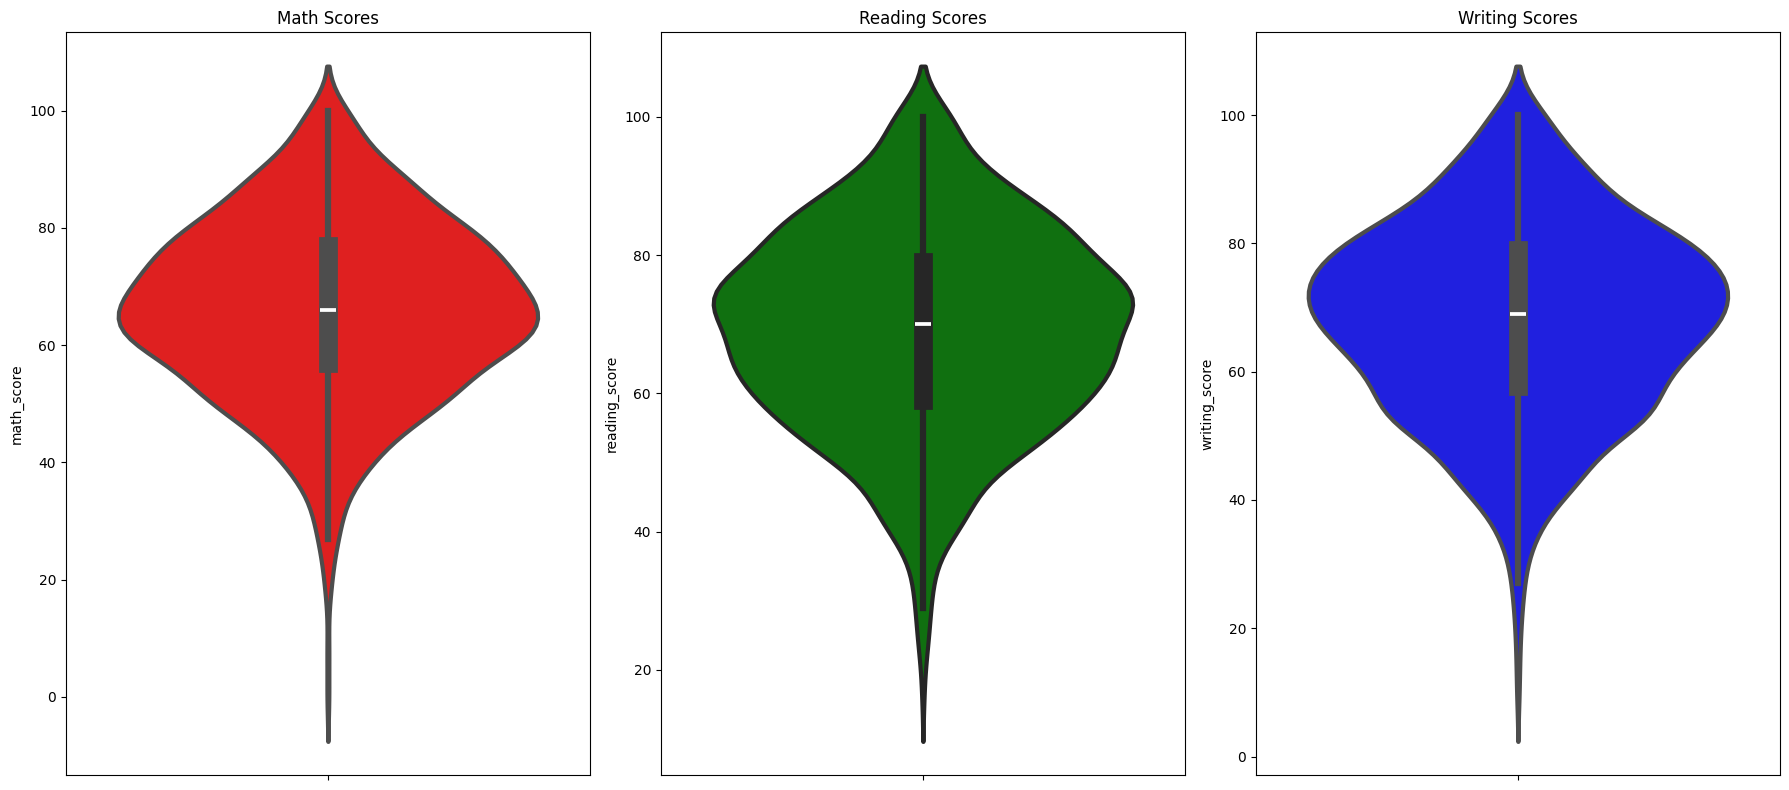

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

# Math Score Violin Plot
sns.violinplot(y='math_score', data=df, color='red', linewidth=3, ax=axs[0])
axs[0].set_title('Math Scores')

# Reading Score Violin Plot
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3, ax=axs[1])
axs[1].set_title('Reading Scores')

# Writing Score Violin Plot
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3, ax=axs[2])
axs[2].set_title('Writing Scores')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


### Insights

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80


### 4.3 Multivariate analysis using pieplot


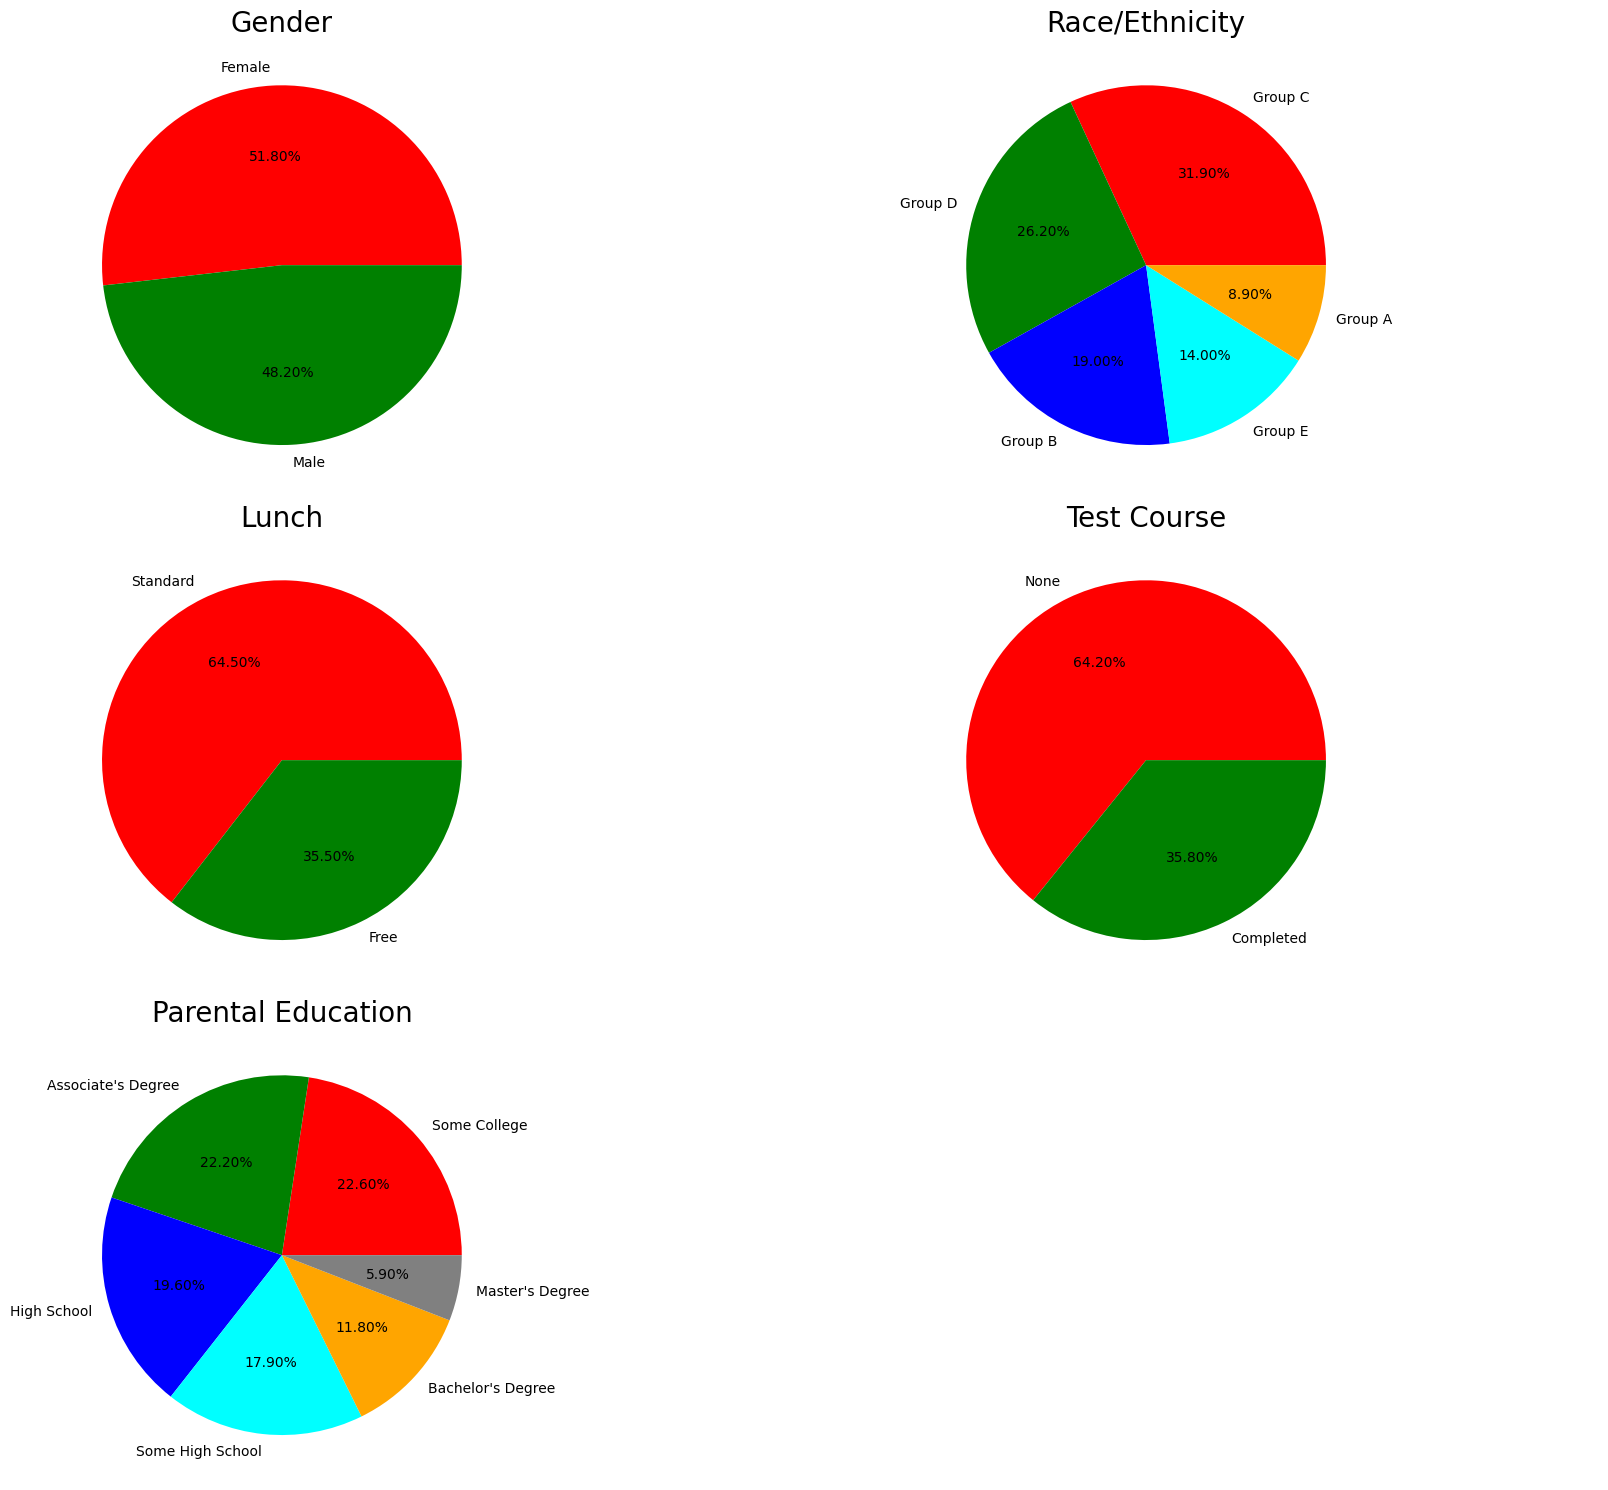

In [38]:
import matplotlib.pyplot as plt

# Set figure size
plt.rcParams['figure.figsize'] = (18, 15)

# Create 3 rows and 2 columns of subplots
fig, axs = plt.subplots(3, 2)

# 1st Pie chart for Gender distribution (Top Left)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
color = ['red', 'green']
axs[0, 0].pie(size, colors=color, labels=labels, autopct='%.2f%%')
axs[0, 0].set_title('Gender', fontsize=20)
axs[0, 0].axis('off')

# 2nd Pie chart for Race/Ethnicity distribution (Top Right)
size = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
color = ['red', 'green', 'blue', 'cyan', 'orange']
axs[0, 1].pie(size, colors=color, labels=labels, autopct='%.2f%%')
axs[0, 1].set_title('Race/Ethnicity', fontsize=20)
axs[0, 1].axis('off')

# 3rd Pie chart for Lunch distribution (Middle Left)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free']
color = ['red', 'green']
axs[1, 0].pie(size, colors=color, labels=labels, autopct='%.2f%%')
axs[1, 0].set_title('Lunch', fontsize=20)
axs[1, 0].axis('off')

# 4th Pie chart for Test Preparation Course distribution (Middle Right)
size = df['test_preparation_course'].value_counts()
labels = ['None', 'Completed']
color = ['red', 'green']
axs[1, 1].pie(size, colors=color, labels=labels, autopct='%.2f%%')
axs[1, 1].set_title('Test Course', fontsize=20)
axs[1, 1].axis('off')

# 5th Pie chart for Parental Education distribution (Bottom Left)
size = df['parental_level_of_education'].value_counts()
labels = ["Some College", "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"]
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
axs[2, 0].pie(size, colors=color, labels=labels, autopct='%.2f%%')
axs[2, 0].set_title('Parental Education', fontsize=20)
axs[2, 0].axis('off')

# Turn off the empty subplot (Bottom Right)
axs[2, 1].axis('off')

# Layout adjustment and display
plt.tight_layout()  # Adjusts space between subplots
plt.show()


### Insights

- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"
